In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from predcontrol_sf.data_loader import load_data_bom_aus

In [2]:
data_folder = Path(r"C:\Users\sgnodde\Documents\data\data_stony_creek_at_spotswood")

In [3]:
rainfall = load_data_bom_aus(data_folder/'stonycreek_rainfall.csv')
discharge = load_data_bom_aus(data_folder/'stonycreek_discharge.csv')
level = load_data_bom_aus(data_folder/'stonycreek_level.csv')

<AxesSubplot:xlabel='date'>

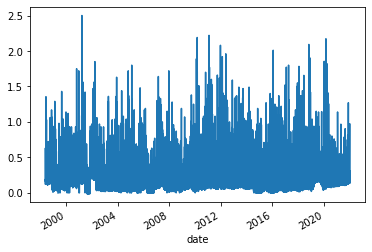

In [4]:
level['Value'].plot()

In [5]:
level.index.to_series().diff().dt.seconds.value_counts()

360.0      208288
720.0       16350
1440.0      10590
1080.0       9360
1800.0       6223
            ...  
1079.0          1
22679.0         1
7740.0          1
2280.0          1
3239.0          1
Name: date, Length: 342, dtype: int64

In [6]:
discharge.index.to_series().diff().dt.seconds.value_counts()

360.0      208293
720.0       16351
1440.0      10590
1080.0       9361
1800.0       6223
            ...  
51420.0         1
29820.0         1
26340.0         1
1320.0          1
719.0           1
Name: date, Length: 328, dtype: int64

In [7]:
discharge.index.to_series().diff().dt.seconds.value_counts().iloc[0]/len(discharge)

0.6597751684336227

In [12]:
import matplotlib.pyplot as plt

It starts to get interesting from lag = 20
That's on average 6*20 = 120 min = 2 hours


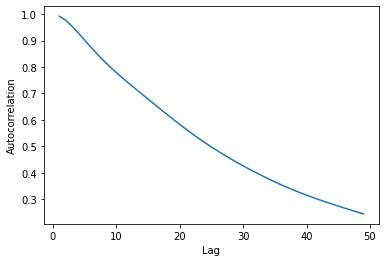

In [15]:
lags = np.arange(1,50)
autocorr = [discharge['Value'].autocorr(lag=lag) for lag in lags]
plt.plot(lags, autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
print("It starts to get interesting from lag = 20")
print("That's on average 6*20 = 120 min = 2 hours")

In [8]:
rainfall.index.to_series().diff().dt.seconds.value_counts()

360.0      34580
60.0        9003
720.0       1430
1080.0       897
120.0        772
           ...  
21780.0        1
15360.0        1
29220.0        1
54060.0        1
32280.0        1
Name: date, Length: 1029, dtype: int64

In [17]:
rainfall.index.to_series().diff().dt.seconds.median()

360.0

In [9]:
rainfall.index.to_series().diff().dt.seconds.value_counts().iloc[0]/len(rainfall)

0.5676389960439272